<a href="https://colab.research.google.com/github/its-amrita-sarkar-01/Image-Compression-using-KMeans-Clustering/blob/main/Image_Compression_using_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# **Example 1**:

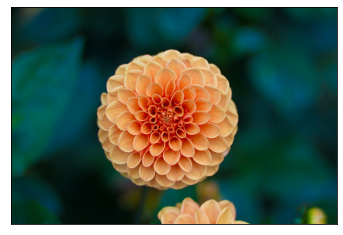

In [2]:
from sklearn.datasets import load_sample_image
flower = load_sample_image('flower.jpg')
ax = plt.axes(xticks = [], yticks = [])
ax.imshow(flower);

In [3]:
flower.shape

(427, 640, 3)

In [4]:
print(flower)

[[[ 2 19 13]
  [ 3 18 13]
  [ 7 20 13]
  ...
  [ 1 77 64]
  [ 0 76 64]
  [ 0 75 63]]

 [[ 1 18 12]
  [ 3 18 13]
  [ 7 20 13]
  ...
  [ 0 76 64]
  [ 1 74 65]
  [ 1 74 65]]

 [[ 2 17 12]
  [ 6 19 12]
  [ 7 20 13]
  ...
  [ 1 74 65]
  [ 1 74 67]
  [ 1 74 67]]

 ...

 [[ 0 46 40]
  [ 1 48 40]
  [ 1 47 37]
  ...
  [ 5 44 26]
  [ 6 43 26]
  [ 7 44 27]]

 [[ 0 47 41]
  [ 1 48 40]
  [ 1 47 37]
  ...
  [ 6 45 27]
  [ 7 44 27]
  [ 7 44 27]]

 [[ 0 47 41]
  [ 1 48 40]
  [ 0 46 36]
  ...
  [ 7 46 28]
  [ 8 45 28]
  [ 9 43 27]]]


In [5]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [6]:
data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

In [7]:
def plot_pixels(data, title, colors = None, N = 10000):
  if colors is None:
    colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize = (16, 6))
    ax[0].scatter(R, G, color = colors, marker = '.')
    ax[0].set(xlabel = 'Red', ylabel = 'Green', xlim = (0,1), ylim = (0,1))

    ax[1].scatter(R, B, color = colors, marker = '.')
    ax[1].set(xlabel = 'Red', ylabel = 'Blue', xlim = (0,1), ylim = (0,1))

    fig.suptitle(title, size = 20)

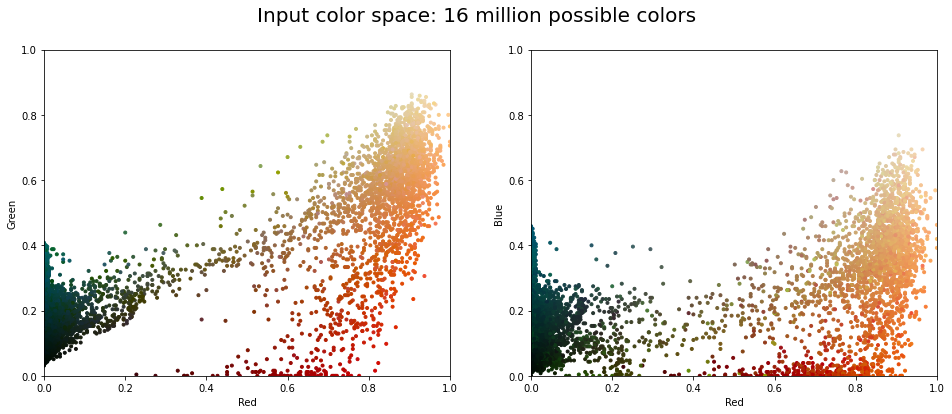

In [8]:
plot_pixels(data, title = 'Input color space: 16 million possible colors')

In [9]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors = new_colors, title = 'Reduced color space: 16 colors')

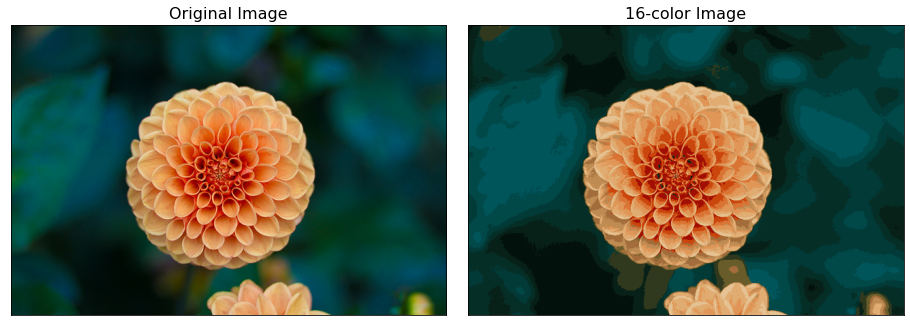

In [10]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize = (16,6), subplot_kw = dict(xticks = [], yticks = []))
fig.subplots_adjust(wspace = 0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size = 16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size = 16);

# **Example 2**:

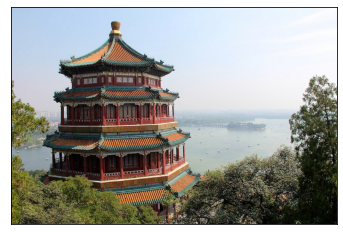

In [11]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
ax = plt.axes(xticks = [], yticks = [])
ax.imshow(china);

In [12]:
china.shape

(427, 640, 3)

In [13]:
print(china)

[[[174 201 231]
  [174 201 231]
  [174 201 231]
  ...
  [250 251 255]
  [250 251 255]
  [250 251 255]]

 [[172 199 229]
  [173 200 230]
  [173 200 230]
  ...
  [251 252 255]
  [251 252 255]
  [251 252 255]]

 [[174 201 231]
  [174 201 231]
  [174 201 231]
  ...
  [252 253 255]
  [252 253 255]
  [252 253 255]]

 ...

 [[ 88  80   7]
  [147 138  69]
  [122 116  38]
  ...
  [ 39  42  33]
  [  8  14   2]
  [  6  12   0]]

 [[122 112  41]
  [129 120  53]
  [118 112  36]
  ...
  [  9  12   3]
  [  9  15   3]
  [ 16  24   9]]

 [[116 103  35]
  [104  93  31]
  [108 102  28]
  ...
  [ 43  49  39]
  [ 13  21   6]
  [ 15  24   7]]]


In [14]:
data = china / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [15]:
data

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

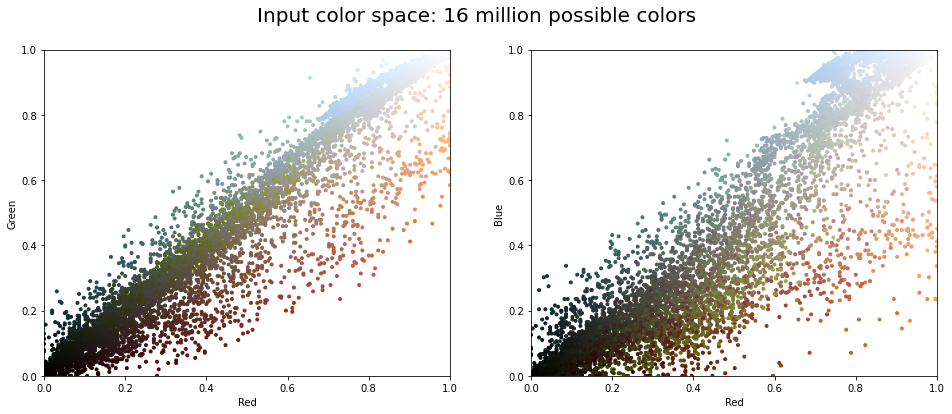

In [16]:
plot_pixels(data, title = 'Input color space: 16 million possible colors')

In [17]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors = new_colors, title = 'Reduced color space: 16 colors')

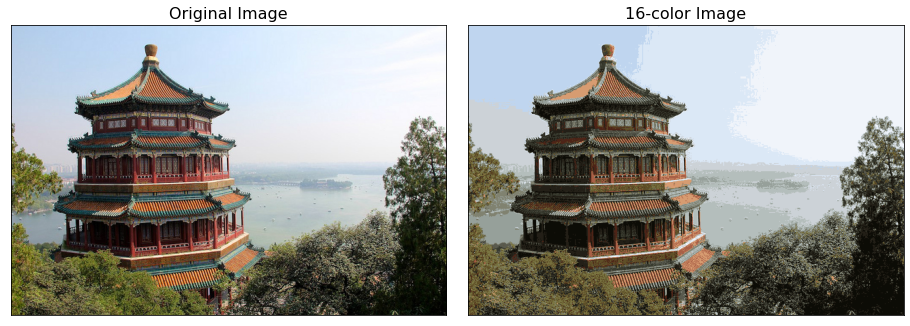

In [19]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize = (16,6), subplot_kw = dict(xticks = [], yticks = []))
fig.subplots_adjust(wspace = 0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size = 16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size = 16);